References:

https://deepnote.com/@flsbustamante/customer-churn-prediction-8eac729e-7ba2-4fb2-9ce0-7018e476d572
https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import imblearn
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from platform import python_version
import os

%matplotlib inline

packages = {'Pandas': pd,
            'Matplotlib': matplotlib,
            'Seaborn': sns,
            'NumPy': np,
            'Scikit-Learn': sklearn,
            'Imbalanced-Learn': imblearn}

print('Versions of the packages:\n')
print('{0:-^20} | {1:-^10}'.format('', ''))
print('{0:^20} | {1:^10}'.format('Package', 'Version'))
print('{0:-^20} | {1:-^10}'.format('', ''))

for name, alias in sorted(packages.items()):
    print(f'{name:<20} | {alias.__version__:>10}')

print()
print('{0}: {1}'.format('Python version', python_version()))

Versions of the packages:

-------------------- | ----------
      Package        |  Version  
-------------------- | ----------
Imbalanced-Learn     |     0.10.1
Matplotlib           |      3.7.0
NumPy                |     1.23.5
Pandas               |      1.5.3
Scikit-Learn         |      1.2.1
Seaborn              |     0.12.2

Python version: 3.8.16


In [2]:
# set working directory
os.chdir("C:\\Users\Mumtaz\Desktop\Thesis data")

In [3]:
# load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

## Basic Data Exploration and processing

In [4]:
# display first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# data description 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# shape - 7043 rows & 21 columns
df.shape

(7043, 21)

In [7]:
# columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Note: It appears that SenoirCitizen is an integer, this should be a categorical value. Also TotalCharges is displayed as an object, this should be numerical.

In [9]:
# Convert types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [10]:
# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges. Let's replace them with the median.

In [11]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [12]:
# check NANs
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Check unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
#drop column customerID, this is not relevant
df.drop(columns=['customerID'], inplace = True)

In [15]:
# Check the target variable
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

This is an inbalanced dataset. There are a lot more people that do not churn when compared to the amount of people that do churn. 

## Exploratory Data Analysis

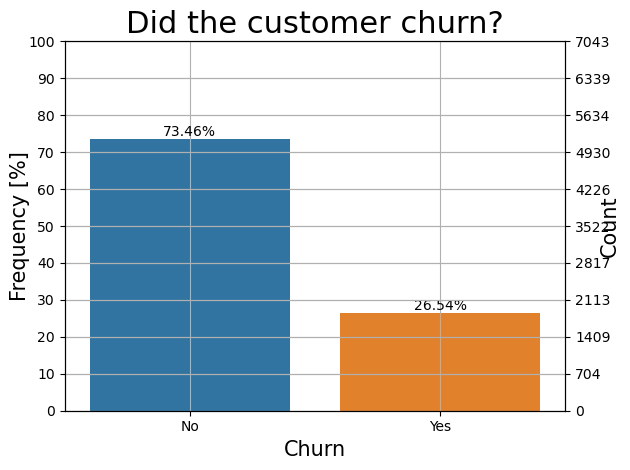

In [16]:
# Distribution of the class variable
# Reference: https://raunakm90.github.io/posts/credit-card-fraud-detection-data-exploration/
map_dict = {'No': 'No', 'Yes':'Yes'}
df['Churn'] = df['Churn'].map(map_dict)
ncount = len(df)

plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(x = 'Churn', data = df, )
plt.title("Did the customer churn?", fontsize=22)
g.set_xlabel('Churn', fontsize=15)
g.set_ylabel('Frequency [%]', fontsize=15, labelpad=25)
g.axes.grid('off')

g2 = g.twinx()
g2.yaxis.tick_left()
g.yaxis.tick_right()

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

g.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
g2.set_ylim(0,100)
g.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
g2.yaxis.set_major_locator(ticker.MultipleLocator(10))
g2.set_ylabel('Count', fontsize=15, labelpad=25)
g2.axes.grid('off')
plt.tight_layout()

Note: 73.46% did not churn and 26.54% did churn.

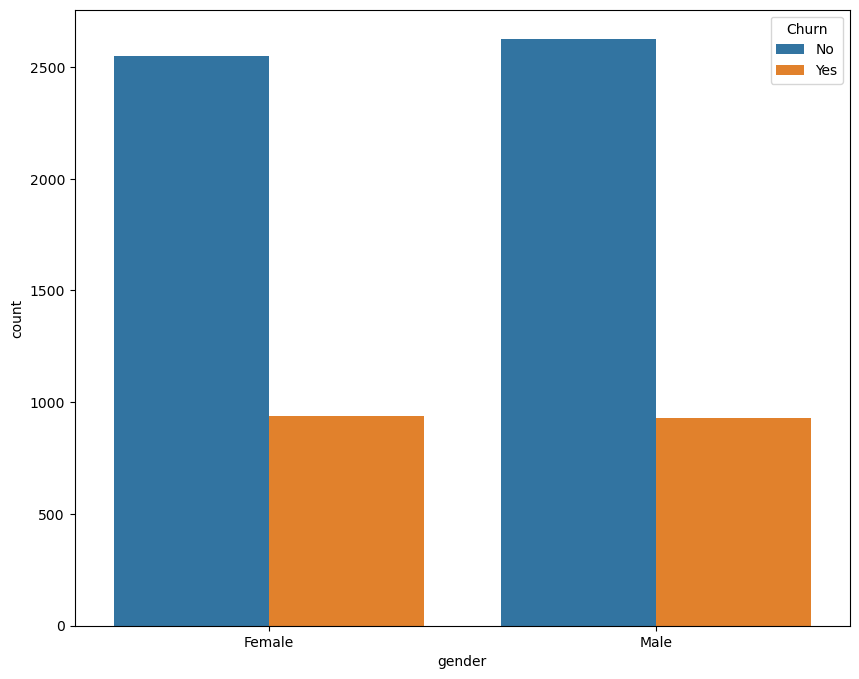

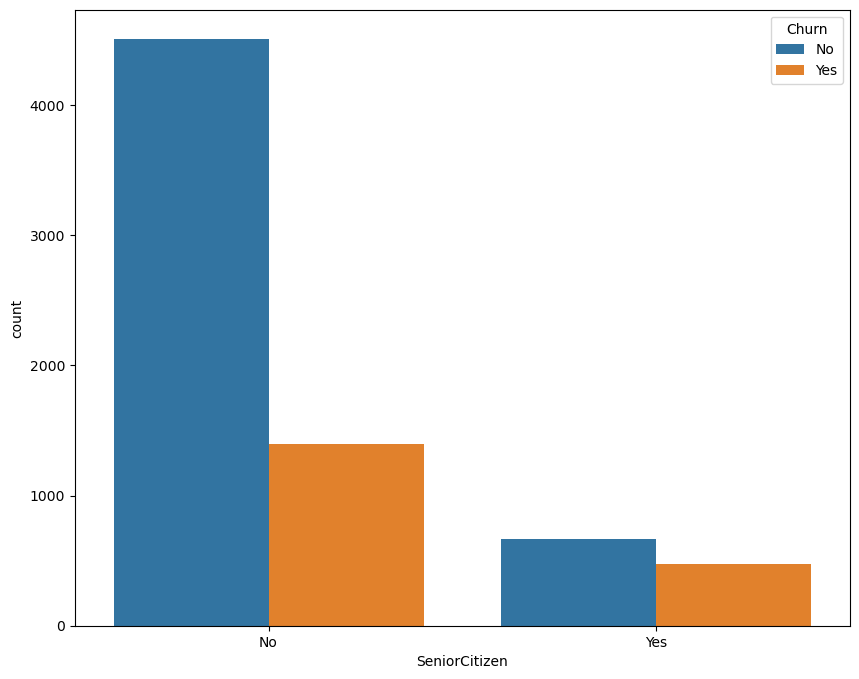

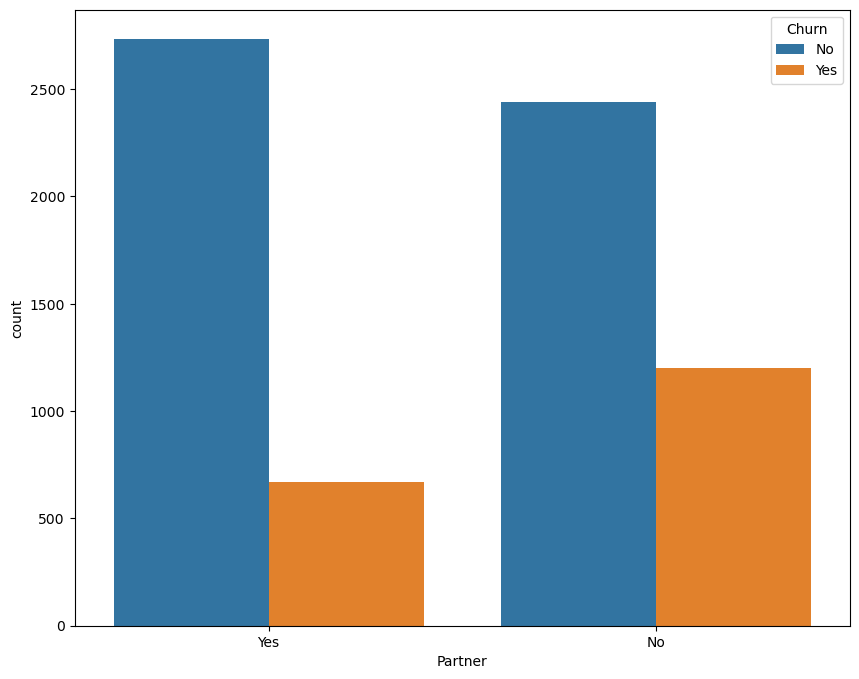

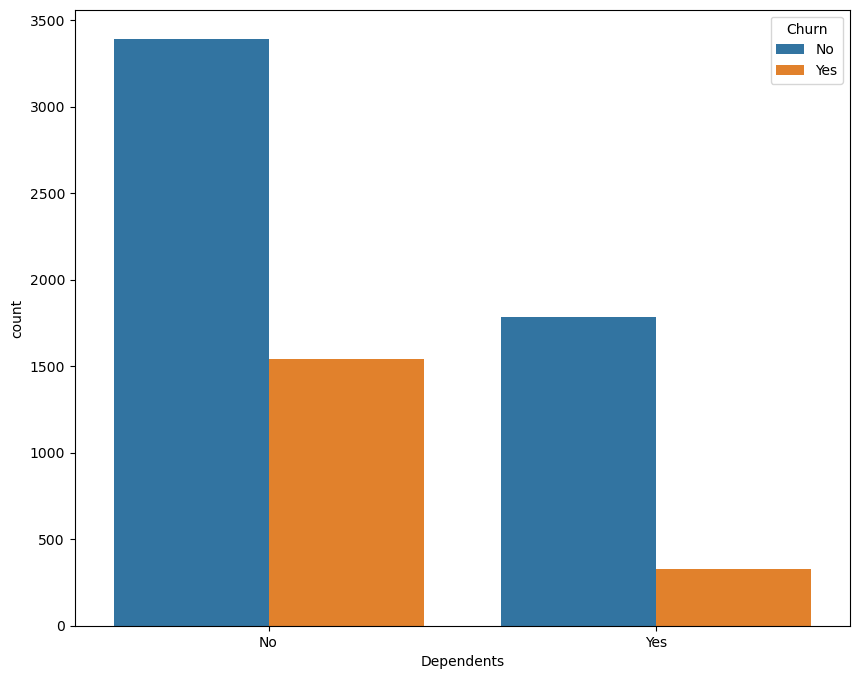

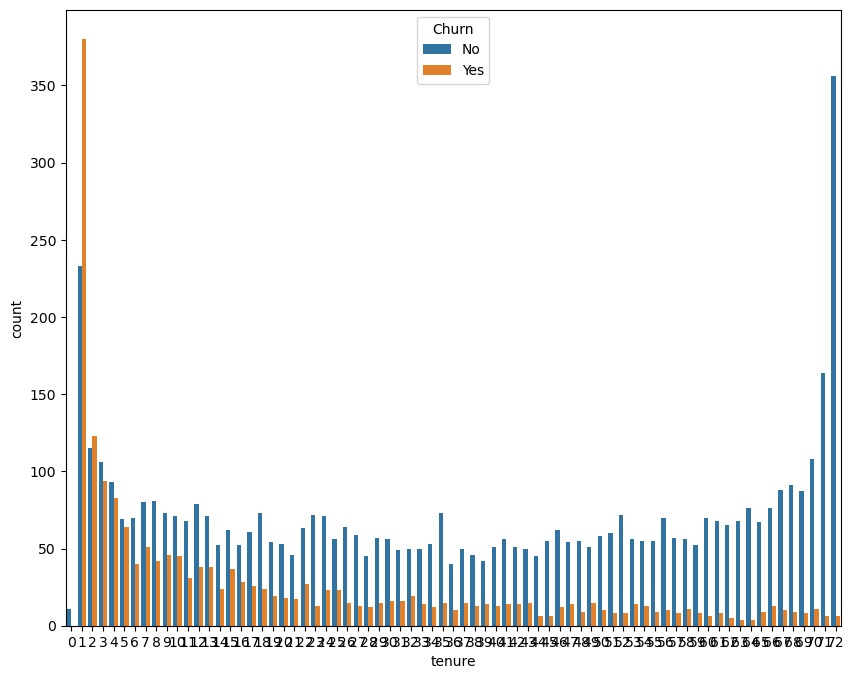

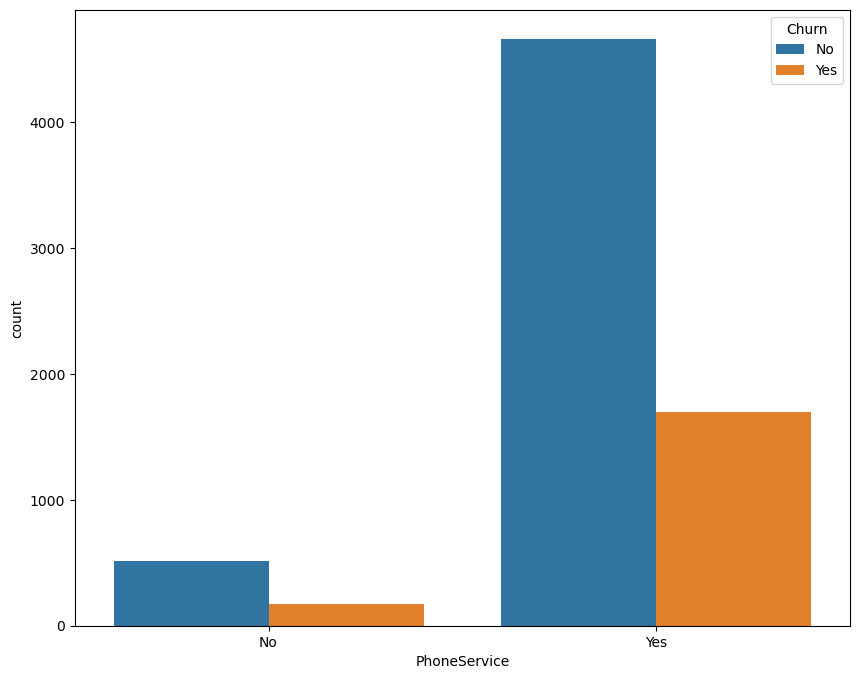

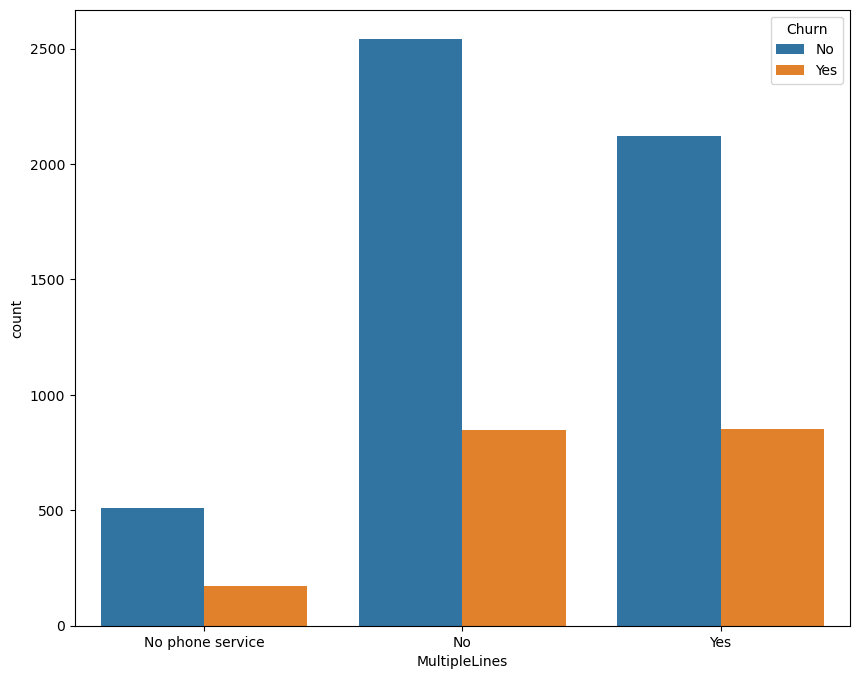

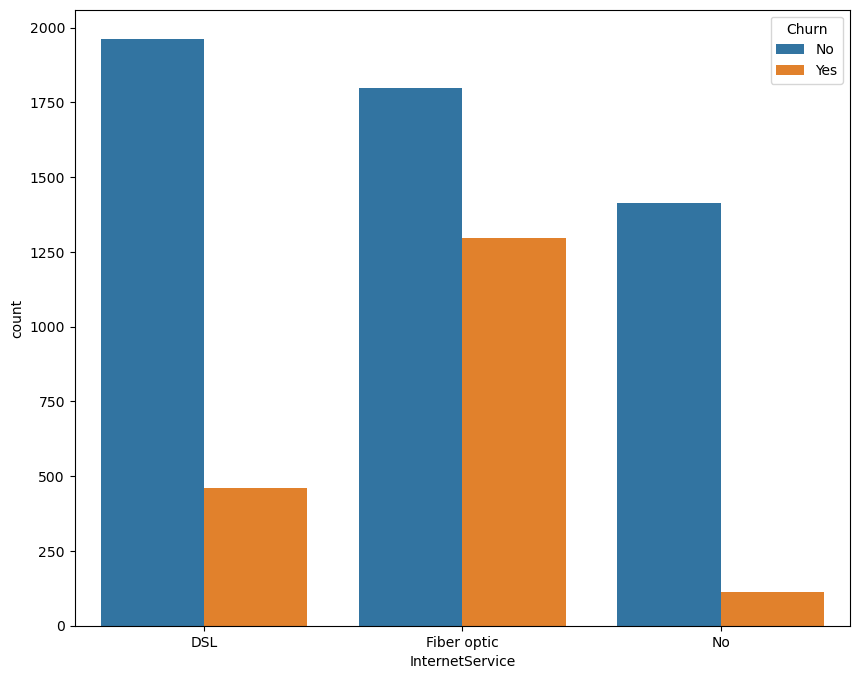

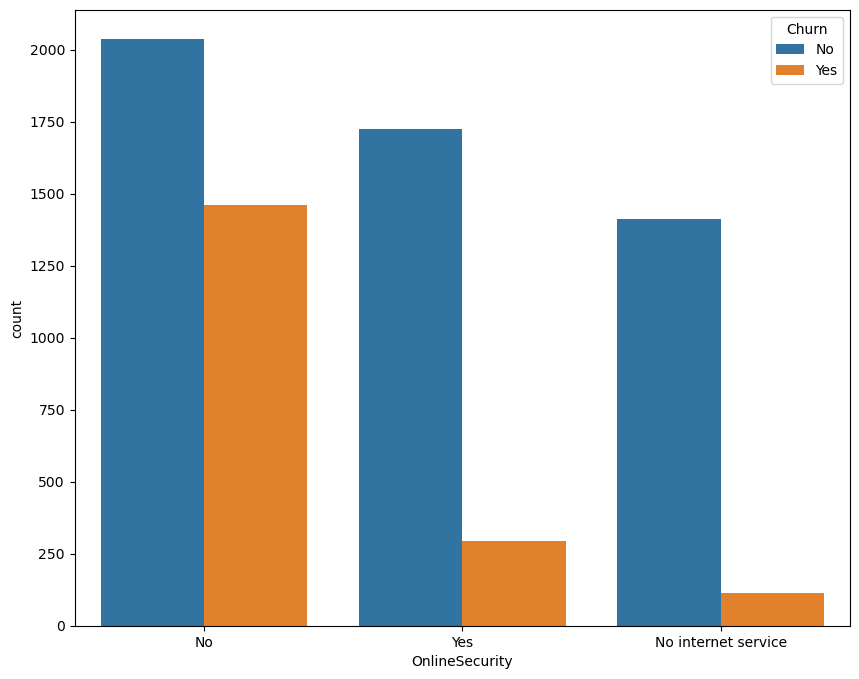

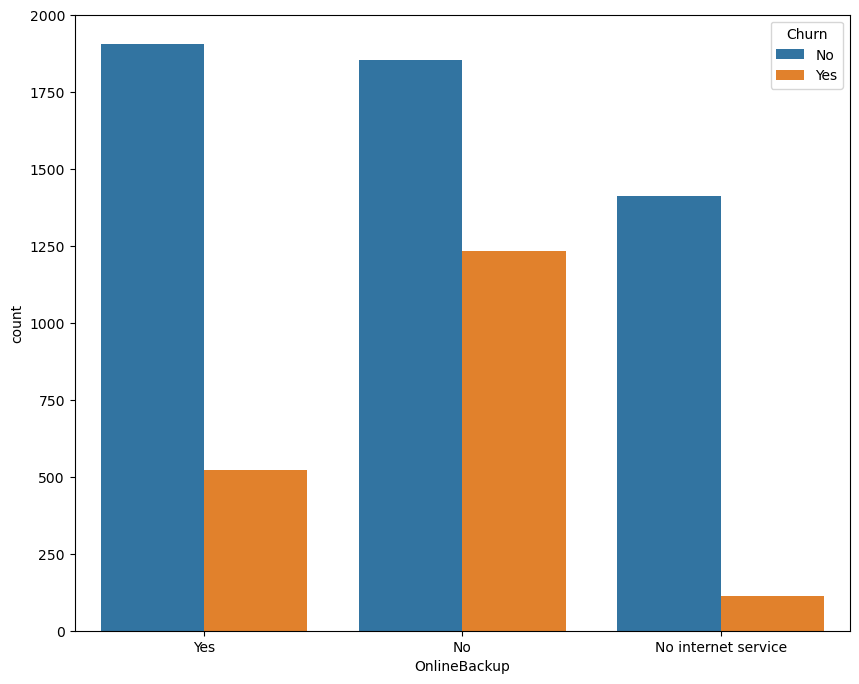

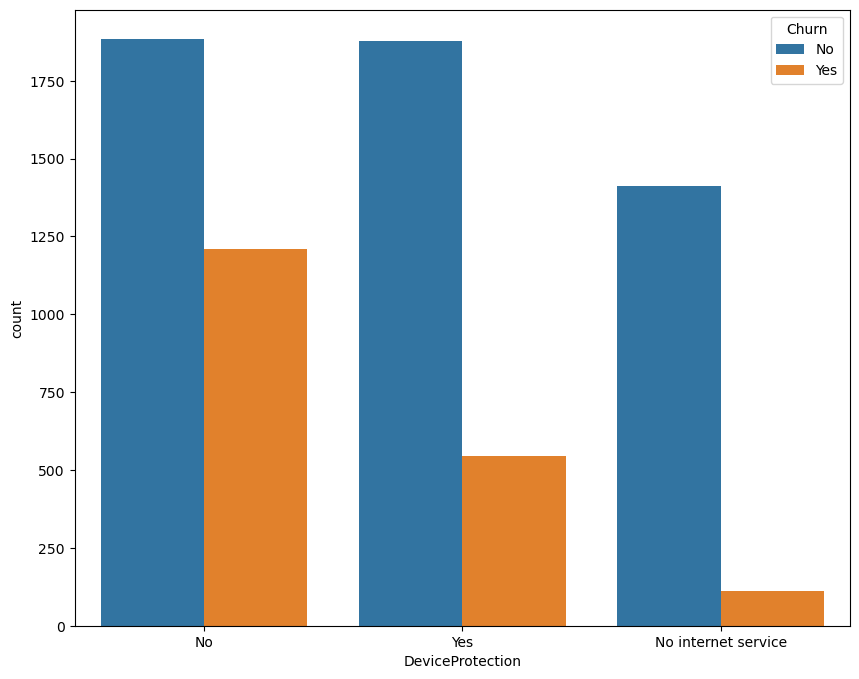

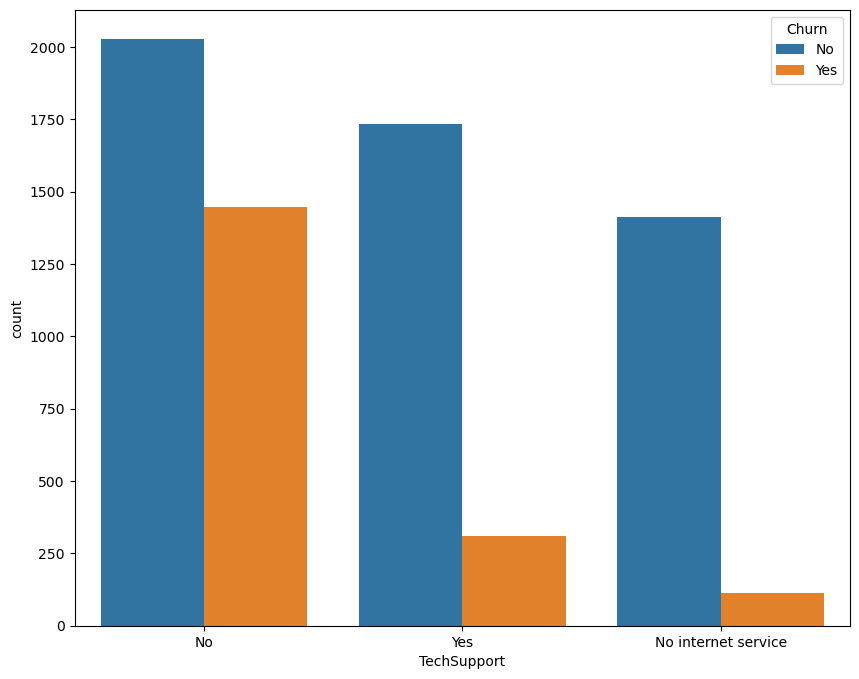

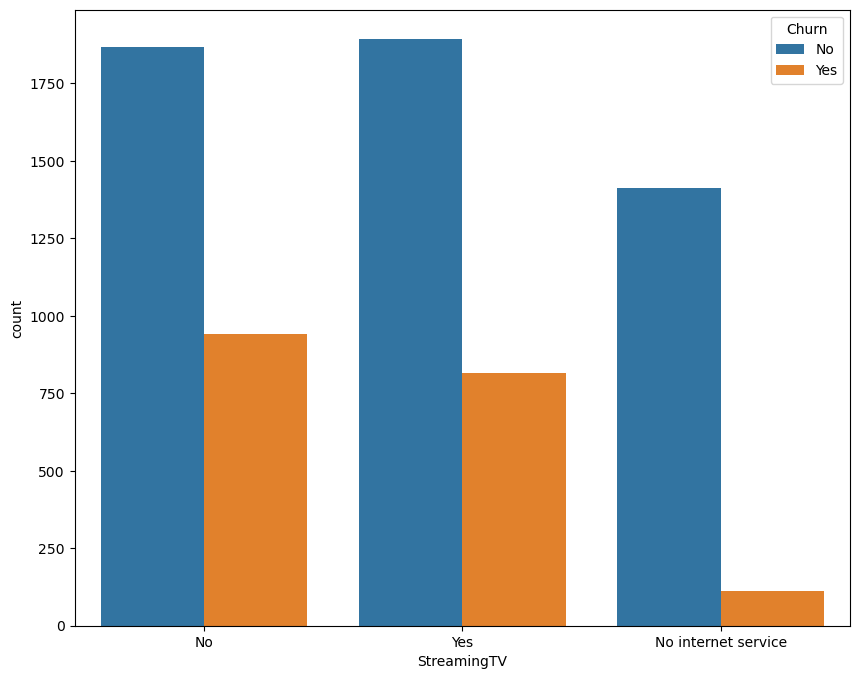

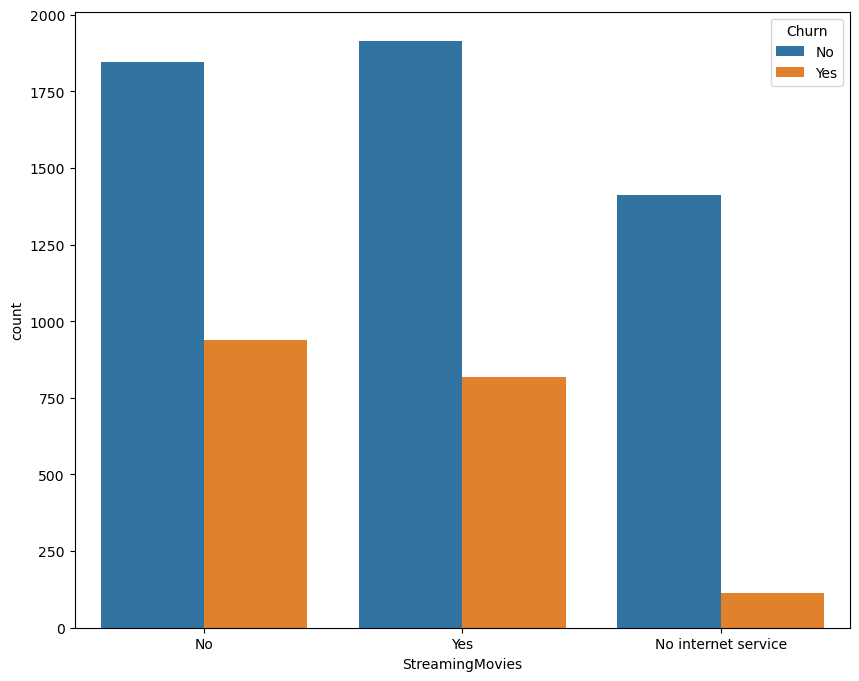

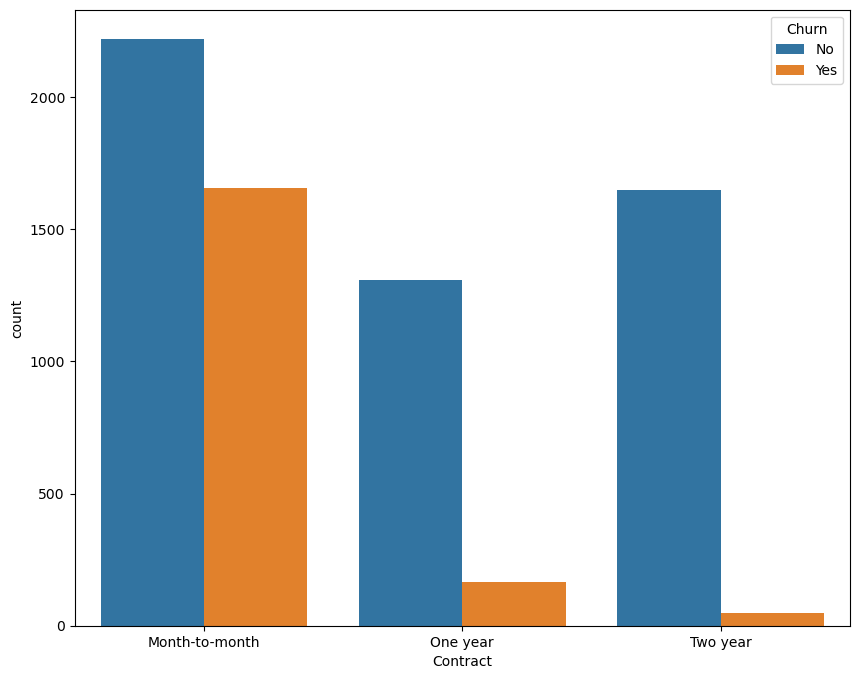

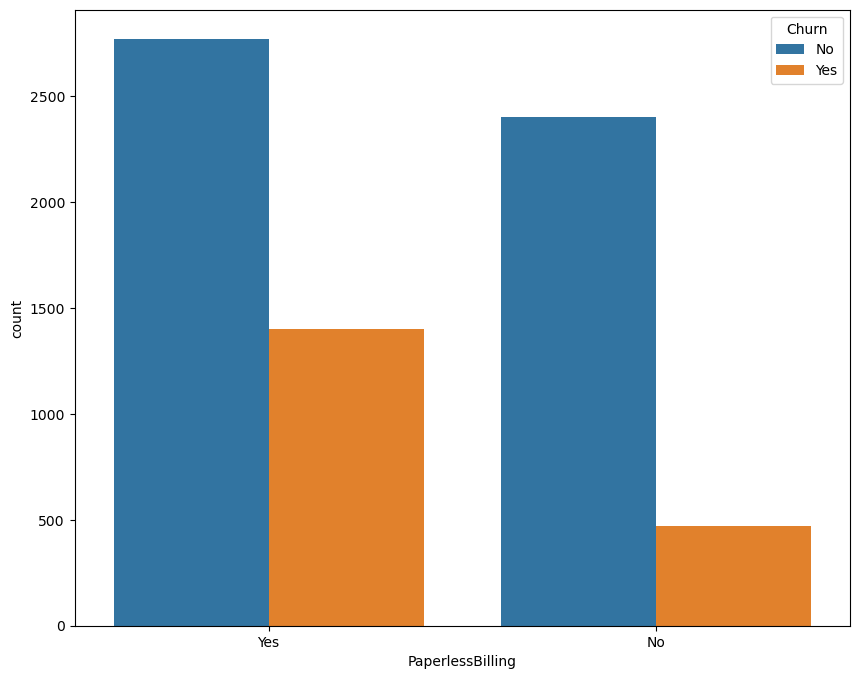

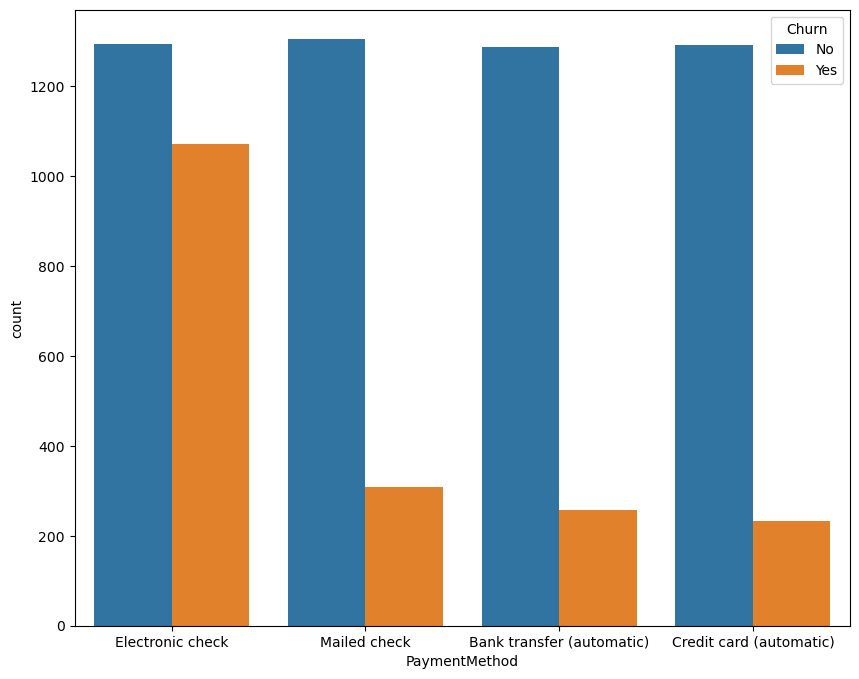

In [17]:
# Relationship with target variable
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [18]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


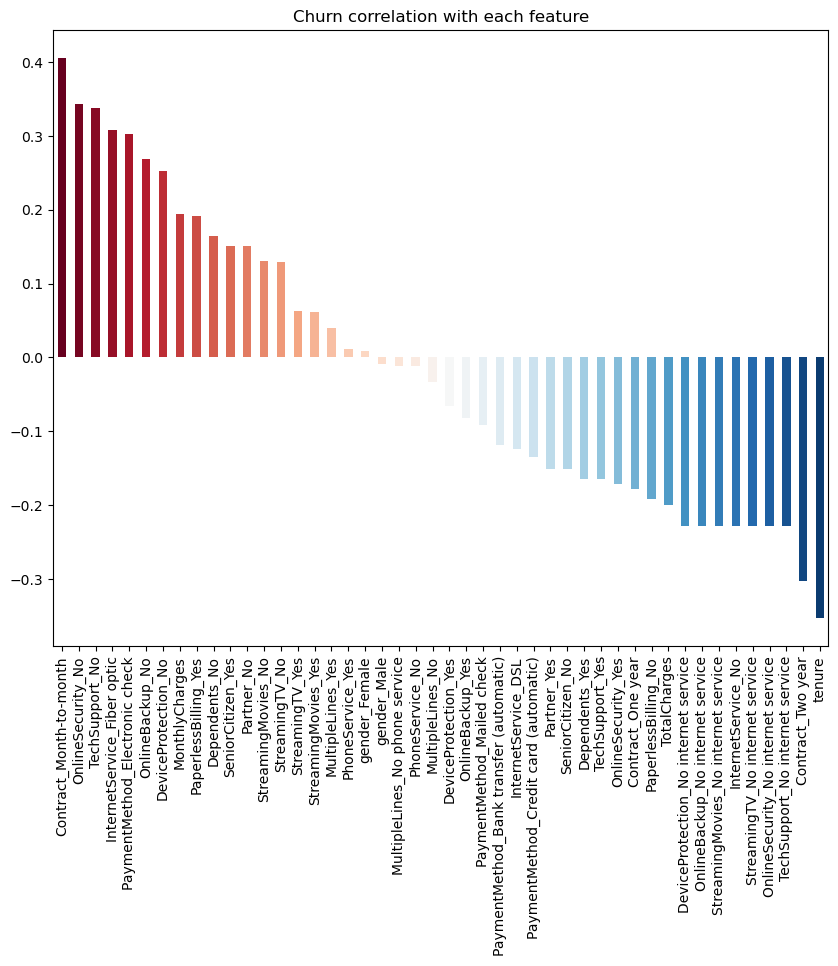

In [19]:
fig, ax = plt.subplots()
colormap = plt.get_cmap('RdBu')
churn_corr_dummies = df_dummies.corr()['Churn'].sort_values(ascending=False)
churn_corr_dummies[1:].plot(kind='bar',
                            color=colormap(np.linspace(0, 1,len(churn_corr_dummies))),
                            ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_title('Churn correlation with each feature')
plt.show()

Notes:

Gender - No relationship

SeniorCitizen - There is a relationship, Seniors tend to churn more

Partner - Single people churn more

Dependents - People without dependents tend to churn more, this ties in with single people (1 person household)

Tenure - Most customers churn within the first year, almost 50/50

PhoneService - In proportion more people churn when there is no phone service

MultipleLines - No relationship

InternetService - People with fiber optics internet churn more (quality issue?)

OnlineSecurity - High churn rate within customers who do not have online security

OnlineBackup - Same

DeviceProtection - Same

TechSupport - Same

StreamingTV - No relation

StreamingMovies - No relation

Contract - Month to month churns the most

PaperlessBilling - More churning when paperless billing is used

PaymentMethod - People with electronic check churn more

High churn rate among customers who spend more. Between 70 and 100 dollars monthly.

Total charges is related to monthly charges. It is essentially MonthlyCharges * tenure.